## **Text Preprocessing Using Spacy:** 

#### General Feature Extraction >: 
File Loading <br>
Word Counts <br>
Characters Counts<br>
Avg Characters per word<br>
Stopwards Counts<br>
Count #Hashtag and @Mentions<br>
If numeric Digits are present in Tweets<br>
Upper case Word Counts<br>

#### Preprocessing and Cleaning >:
Lower case<br>
Contraction to expansion<br>
Email, URL, RT(retweet), Multispace REMOVAL<br>
HTML tags, Stopwards, Specialcharac, accended chaac REMOVAL<br>
Conversion into base form of words<br>
Common occuring word REMOVAL<br>
Word Cloud<br>
Spelling Correction<br>
Tokenization <br>
Lemmetization<br>
Detecting Entities using NER<br>
Noun Detection <br>
Language Detection <br>
Sentence Translation<br>
Using inbuild 'SENTIMENT CLASSIFIER' <br>

#### Advance Text processing and Feature Extraction >:
N-Gram, Bi-Gram ect<br>
Bag Of Words (BOW)<br>
Term Frequency Calculation 'TF'<br>
Inverse Document Frequency 'IDF'<br>
'TF-IDF' Term Frequency-Inverse Document Frequency<br>
Word Embeddings 'word2wec' using SPACY<br>

#### Machine Learning Models for Text Classification >:
SGD Classifier<br>
Logistic Regression <br>
Logistic Regression CV<br>
LinearSVC<br>
RandomForestClassifier<br>



In [1]:
import pandas as pd 
import numpy as np 

In [2]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

In [3]:
dataset = pd.read_csv('C:/Users/Dream Walker/Desktop/twitter.csv', encoding='latin1',  header=None)
dataset.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [4]:
df = dataset[[5, 0]]
df.columns = ['twitts', 'sentiment']
df.head()

,twitts,sentiment
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,is upset that he can't update his Facebook by ...,0
2,@Kenichan I dived many times for the ball. Man...,0
3,my whole body feels itchy and like its on fire,0
4,"@nationwideclass no, it's not behaving at all....",0


In [5]:
df.sentiment.value_counts()

4    800000
0    800000
Name: sentiment, dtype: int64

In [6]:
map = {0: 'Negative', 4: 'Positive'}


In [7]:
# WORD COUNT:
df['word_count'] = df['twitts'].apply(lambda x : len(str(x).split()))
df.head()

C:\Users\Dream Walker\anaconda3\envs\Ai\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,twitts,sentiment,word_count
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19
1,is upset that he can't update his Facebook by ...,0,21
2,@Kenichan I dived many times for the ball. Man...,0,18
3,my whole body feels itchy and like its on fire,0,10
4,"@nationwideclass no, it's not behaving at all....",0,21


In [8]:
# CHARACTER COUNT:
df['char_count'] = df['twitts'].apply(lambda x : len(x))
df.head()

C:\Users\Dream Walker\anaconda3\envs\Ai\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,twitts,sentiment,word_count,char_count
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115
1,is upset that he can't update his Facebook by ...,0,21,111
2,@Kenichan I dived many times for the ball. Man...,0,18,89
3,my whole body feels itchy and like its on fire,0,10,47
4,"@nationwideclass no, it's not behaving at all....",0,21,111


In [9]:
# Average char calculation :
def avg(x):
    words = x.split()
    word_len = 0 
    for word in words:
        word_len = word_len + len(word)
    return word_len / len(words)
df['avg_count'] = df['twitts'].apply(lambda x : avg(x))
df.head()

C:\Users\Dream Walker\anaconda3\envs\Ai\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,twitts,sentiment,word_count,char_count,avg_count
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115,5.052632
1,is upset that he can't update his Facebook by ...,0,21,111,4.285714
2,@Kenichan I dived many times for the ball. Man...,0,18,89,3.944444
3,my whole body feels itchy and like its on fire,0,10,47,3.700000
4,"@nationwideclass no, it's not behaving at all....",0,21,111,4.285714


In [10]:
# Stopword counts
df['stop_words'] = df['twitts'].apply(lambda x : len([t for t in x.split() if t in STOP_WORDS]))
df.head()


,twitts,sentiment,word_count,char_count,avg_count,stop_words
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115,5.052632,4
1,is upset that he can't update his Facebook by ...,0,21,111,4.285714,9
2,@Kenichan I dived many times for the ball. Man...,0,18,89,3.944444,7
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5
4,"@nationwideclass no, it's not behaving at all....",0,21,111,4.285714,10


In [11]:
# Count #HASHTAG and @MENTIONS:
#x = "this is my #Hashtag #ooo and @rehanraza44"
#x = x.split()
#x

In [12]:
# Count #HASHTAG and @MENTIONS:

df['#tag'] = df['twitts'].apply(lambda x : len([t for t in x.split() if t.startswith('#')]))
df['@'] = df['twitts'].apply(lambda x : len([t for t in x.split() if t.startswith('@')]))
df.head()

,twitts,sentiment,word_count,char_count,avg_count,stop_words,#tag,@
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115,5.052632,4,0,1
1,is upset that he can't update his Facebook by ...,0,21,111,4.285714,9,0,0
2,@Kenichan I dived many times for the ball. Man...,0,18,89,3.944444,7,0,1
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0
4,"@nationwideclass no, it's not behaving at all....",0,21,111,4.285714,10,0,1


In [13]:
# Count numaric in dataset
df['numaric'] = df['twitts'].apply(lambda x : len([t for t in x.split() if t.isdigit()]))
df.tail()

,twitts,sentiment,word_count,char_count,avg_count,stop_words,#tag,@,numaric
1599995,Just woke up. Having no school is the best fee...,4,11,56,4.090909,4,0,0,0
1599996,TheWDB.com - Very cool to hear old Walt interv...,4,11,78,6.090909,1,0,0,0
1599997,Are you ready for your MoJo Makeover? Ask me f...,4,11,57,4.181818,5,0,0,0
1599998,Happy 38th Birthday to my boo of alll time!!! ...,4,12,65,4.416667,3,0,0,0
1599999,happy #charitytuesday @theNSPCC @SparksCharity...,4,5,62,11.400000,0,1,3,0


In [14]:
# Count upercase 
df['upercase'] = df['twitts'].apply(lambda x : len([t for t in x.split() if t.isupper()]))
df.head()

,twitts,sentiment,word_count,char_count,avg_count,stop_words,#tag,@,numaric,upercase
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115,5.052632,4,0,1,0,1
1,is upset that he can't update his Facebook by ...,0,21,111,4.285714,9,0,0,0,0
2,@Kenichan I dived many times for the ball. Man...,0,18,89,3.944444,7,0,1,0,1
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0,0,0
4,"@nationwideclass no, it's not behaving at all....",0,21,111,4.285714,10,0,1,0,1


In [15]:
df.loc[96]['twitts']

"so rylee,grace...wana go steve's party or not?? SADLY SINCE ITS EASTER I WNT B ABLE 2 DO MUCH  BUT OHH WELL....."

### Preprocessing and Cleaning: 

In [16]:
# Convert to Lower Case : 
df['twitts'] = df['twitts'].apply(lambda x : x.lower())
df['twitts'].head(2)


0    @switchfoot http://twitpic.com/2y1zl - awww, t...
1    is upset that he can't update his facebook by ...
Name: twitts, dtype: object

In [17]:
# Contaction to Expansion > can't TO can not ,you'll TO you will
contractions = { 
"ain't": "am not / are not / is not / has not / have not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is / how does",
"i'd": "I had / I would",
"i'd've": "I would have",
"i'll": "I shall / I will",
"i'll've": "I shall have / I will have",
"i'm": "I am",
"i've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}

In [18]:
def cont_to_exp(x):
    if type(x) is str:
        for key in contractions:
            value = contractions[key]
            x = x.replace(key, value)
        return x
    else:
        return x

In [19]:
%%time
df['twitts'] = df['twitts'].apply(lambda x : cont_to_exp(x))


Wall time: 1min 3s


In [20]:
#Remove all emails 
import re
x = "this is rehan raza and email is rehanraza0106@gmail.com"
re.findall(r'([A-Za-z0-9+_]+@[A-Za-z0-9+_]+\.[A-Za-z0-9+_]+)', x)


['rehanraza0106@gmail.com']

In [21]:
df['emails'] = df['twitts'].apply(lambda i : re.findall(r'([A-Za-z0-9+_-]+@[A-Za-z0-9+_-]+\.[A-Za-z0-9+_-]+)', i))


In [22]:
df['emails_count'] = df['emails'].apply(lambda i : len(i))


In [23]:
df[df['emails_count']>0]

,twitts,sentiment,word_count,char_count,avg_count,stop_words,#tag,@,numaric,upercase,emails,emails_count
4054,i want a new laptop. hp tx2000 is the bomb. :...,0,20,103,4.150000,6,0,0,0,4,[gabbehhramos@yahoo.com],1
7917,who stole elledell@gmail.com?,0,3,31,9.000000,1,0,0,0,0,[elledell@gmail.com],1
8496,@alexistehpom really? did you send out all th...,0,20,130,5.500000,11,0,1,0,0,[missataari@gmail.com],1
10290,@laureystack awh...that has / that is kinda sa...,0,8,76,8.500000,0,0,1,0,0,[65@hotmail.com],1
16413,"@jilliancyork got 2 bottom of it, human error...",0,21,137,5.428571,7,0,1,1,0,[press@linkedin.com],1
...,...,...,...,...,...,...,...,...,...,...,...,...
1588338,@boudoirsextoys do not forget to shoot me an e...,4,21,127,5.047619,10,0,1,0,1,[hello@tastelikekisses.com],1
1589132,"hi there , anybody got a job for me oil &amp;...",4,15,98,5.533333,4,0,0,0,0,[aadvanspijk@yahoo.co],1
1590489,"@clericaaron yes, lbruton@tulsalanparty.com is...",4,14,95,5.785714,6,0,1,0,1,[lbruton@tulsalanparty.com],1
1591675,@miss_ellen good morning!!!! congrats! se...,4,9,77,7.111111,2,0,1,0,0,[jill@q985fm.com],1


In [24]:
re.sub(r'([A-Za-z0-9+_]+@[A-Za-z0-9+_]+\.[A-Za-z0-9+_]+)','', x)


'this is rehan raza and email is '

In [25]:
df['twitts'] = df['twitts'].apply(lambda i : re.sub(r'([A-Za-z0-9+_]+@[A-Za-z0-9+_]+\.[A-Za-z0-9+_]+)','', i))


In [26]:
# Count URL and Remove it: 
a = " watch our channal, http://khanyoutube.com/rehanraza"
re.findall(r'https?://[^\s<>"]+|www\.[^\s<>"]+', a)

['http://khanyoutube.com/rehanraza']

In [27]:
df['twitts'] = df['twitts'].apply(lambda i : re.sub(r'https?://[^\s<>"]+|www\.[^\s<>"]+','', i))
df.head()

,twitts,sentiment,word_count,char_count,avg_count,stop_words,#tag,@,numaric,upercase,emails,emails_count
0,"@switchfoot - awww, that has / that is a bumm...",0,19,115,5.052632,4,0,1,0,1,[],0
1,is upset that he cannot update his facebook by...,0,21,111,4.285714,9,0,0,0,0,[],0
2,@kenichan i dived many times for the ball. man...,0,18,89,3.944444,7,0,1,0,1,[],0
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0,0,0,[],0
4,"@nationwideclass no, it has / it is not behavi...",0,21,111,4.285714,10,0,1,0,1,[],0


In [28]:
# Remove RT (retweet):
df['twitts'] = df['twitts'].apply(lambda i : re.sub('RT','', i))


In [29]:
# Remove all Punctiations or Special Charactors from Data:
df['twitts'] = df['twitts'].apply(lambda d : re.sub('[^A-Z a-z 0-9-]+','', d))
df.head()

,twitts,sentiment,word_count,char_count,avg_count,stop_words,#tag,@,numaric,upercase,emails,emails_count
0,switchfoot - awww that has that is a bummer ...,0,19,115,5.052632,4,0,1,0,1,[],0
1,is upset that he cannot update his facebook by...,0,21,111,4.285714,9,0,0,0,0,[],0
2,kenichan i dived many times for the ball manag...,0,18,89,3.944444,7,0,1,0,1,[],0
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0,0,0,[],0
4,nationwideclass no it has it is not behaving ...,0,21,111,4.285714,10,0,1,0,1,[],0


In [30]:
# Remove multiple spaces 
x = "Thanks for     watching and     please           subscirbe this   video"
" ".join(x.split())

'Thanks for watching and please subscirbe this video'

In [31]:
df['twitts'] = df['twitts'].apply(lambda d : " ".join(d.split()))


In [32]:
# Remove HTML tags 
from bs4 import BeautifulSoup
x = '<html><h2>thanks for watching<h2><html>'
BeautifulSoup(x, 'lxml').get_text()

'thanks for watching'

In [33]:
df['twitts'] = df['twitts'].apply(lambda x : BeautifulSoup(x, 'lxml').get_text())


C:\Users\Dream Walker\anaconda3\envs\Ai\lib\site-packages\bs4\__init__.py:336: MarkupResemblesLocatorWarning: "cookies" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  MarkupResemblesLocatorWarning
C:\Users\Dream Walker\anaconda3\envs\Ai\lib\site-packages\bs4\__init__.py:336: MarkupResemblesLocatorWarning: "pictures" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  MarkupResemblesLocatorWarning


In [34]:
# Remove Accented Chars
import unicodedata
def remove_acc_data(x):
    x = unicodedata.normalize('NFKD', x).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return x

In [35]:
df['twitts'] = df['twitts'].apply(lambda x : remove_acc_data(x))


## Spacy and NLP 

In [36]:
# Remove Stopwords 
# Example 
x = "this is stopwards removal code and use this"
" ".join(t for t in x.split() if t not in STOP_WORDS)

'stopwards removal code use'

In [37]:
df['twitts'] = df['twitts'].apply(lambda x : " ".join(t for t in x.split() if t not in STOP_WORDS))
df.head()


,twitts,sentiment,word_count,char_count,avg_count,stop_words,#tag,@,numaric,upercase,emails,emails_count
0,switchfoot - awww bummer shoulda got david car...,0,19,115,5.052632,4,0,1,0,1,[],0
1,upset update facebook texting cry result schoo...,0,21,111,4.285714,9,0,0,0,0,[],0
2,kenichan dived times ball managed save 50 rest...,0,18,89,3.944444,7,0,1,0,1,[],0
3,body feels itchy like fire,0,10,47,3.700000,5,0,0,0,0,[],0
4,nationwideclass behaving I mad,0,21,111,4.285714,10,0,1,0,1,[],0


In [38]:
!python -m spacy download en_core_web_sm
# Convert dataset to Base form or Root form :
import spacy 
nlp = spacy.load('en_core_web_sm')
# Dived = dive, time = times, manage= managed 
x = " I bought iphoneX and managed sldj "


[+] Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [39]:
x = "i you she he they are not he may not"
def base(x):
    doc = nlp(x)
    for token in doc:
        lemma = token.lemma_
        lemmma = token.text
        print(lemma, lemmma)

In [40]:
base(x)

i i
-PRON- you
-PRON- she
-PRON- he
-PRON- they
be are
not not
-PRON- he
may may
not not


In [41]:
# We can see that some are converted to -PRON- and -BE-
# Now we will modify this 

x = "i you she he they are not he may not"
def base_new(x):
    doc = nlp(x)
    lis = []
    for token in doc:
        lemma = token.lemma_
        if lemma == '-PRON-' or lemma == 'be':
            lemma = token.text
        lis.append(lemma)
    print(" ".join(lis))
        
base_new(x)

i you she he they are not he may not


In [42]:
x = " I bought iphoneX and managed sldj "
base_new(x)

  I buy iphoneX and manage sldj


In [43]:
# Common word removal 
# We have removed stopwords but also we have some words which is frequntly used in dataset :
#First we will join all dataset like this 
" ".join(df.head()['twitts'])

'switchfoot - awww bummer shoulda got david carr day d upset update facebook texting cry result school today blah kenichan dived times ball managed save 50 rest bounds body feels itchy like fire nationwideclass behaving I mad'

In [44]:
# Now we will join whole dataset 
text = " ".join(df['twitts'])

In [45]:
# We have whole dataset and we will split it into words so that we can calculate word counts :
text = text.split()
import pandas as pd
#Freq common texts, we can see by converting this text to series of pandas and via value counts we can count all:
freq_words = pd.Series(text).value_counts()

In [46]:
freq_words

I                214182
good              89366
day               82299
like              77735
-                 69662
                  ...  
weekguess             1
disappointmet         1
hairstyle-            1
lisaknapp             1
jackbmy               1
Length: 785274, dtype: int64

In [47]:
F20 = freq_words[:20]
F20

I        214182
good      89366
day       82299
like      77735
-         69662
today     64514
going     64078
love      63421
work      62804
got       60749
time      56081
lol       55094
u         52834
know      51177
im        50148
want      42070
new       41995
think     41040
night     41029
amp       40616
dtype: int64

In [48]:
df['twitts'] = df['twitts'].apply(lambda x : " ".join([t for t in x.split() if t not in F20]))


In [49]:
# Rare word removal 
f20 = freq_words[-20:]
df['twitts'] = df['twitts'].apply(lambda x : " ".join([t for t in x.split() if t not in f20]))


In [50]:
# We can also extract rare words by using :
rare = freq_words[freq_words.values == 1]

## Word Cloud Visualization:

In [51]:
!pip install -U textblob
!python -m textblob.download_corpora


  Using cached textblob-0.15.3-py2.py3-none-any.whl (636 kB)
Finished.


[nltk_data] Downloading package brown to C:\Users\Dream
[nltk_data]     Walker\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Dream
[nltk_data]     Walker\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Dream
[nltk_data]     Walker\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Dream Walker\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to C:\Users\Dream
[nltk_data]     Walker\AppData\Roaming\nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to C:\Users\Dream
[nltk_data]     Walker\AppData\Roaming\nltk_data...
[nltk_data]   Pa

In [52]:
! pip install wordcloud

In [53]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [54]:
x =  ' '.join(text[:20000])
len(x)

128179

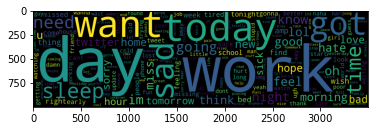

In [55]:
# To visualise wordcloud 
wc = WordCloud(width=3500, height=1000).generate(x)
plt.imshow(wc)


### Spelling Correction: 


In [56]:
# We can correct spelling using textblob: 
from textblob import TextBlob
x = "likee thes vidio nd goo to hel"
TextBlob(x).correct()

TextBlob("like the video nd go to he")

### Tokenization:


In [57]:
# Tokenization using textblob is better than spacy coz it remove . and also # in words
x = "this#is Rehan raza. and like? ? and see this not#ebook * ()"
TextBlob(x).words

WordList(['this', 'is', 'Rehan', 'raza', 'and', 'like', 'and', 'see', 'this', 'not', 'ebook'])

In [58]:
doc = nlp(x)
for token in doc:
    print(token)

this#is
Rehan
raza
.
and
like
?
?
and
see
this
not#ebook
*
(
)


In [59]:
# We can see that spacy use . as in token but textglob do not:

### Lematization:

In [60]:
# Here in lematization spacy work better than textglob:
x = "run running ran runs"
doc = nlp(x)
for token in doc:
    print(token.lemma_)

run
run
run
run


In [61]:
from textblob import Word
for i in x.split():
    print(Word(i).lemmatize())

run
running
ran
run


### Detect Entites using NER spacy:

In [62]:
x = "Breaking News: Donald Trump, the president of the USA is looking to sign a deal to mine the moon"


In [63]:
doc = nlp(x)
for ent in doc.ents:
    print(ent.text, "---", ent.label_, spacy.explain(ent.label_))
    

Donald Trump --- PERSON People, including fictional
USA --- GPE Countries, cities, states


In [64]:
from spacy import displacy 
displacy.render(doc, style='ent')

### Detecting Nouns:

In [65]:
for noun in doc.noun_chunks:
    print(noun)

Breaking
News
Donald Trump
the president
the USA
a deal
the moon


### Translation and Language Detection:

In [66]:
TextBlob(x).detect_language()

'en'

In [67]:
TextBlob(x).translate(to='fr')

TextBlob("Dernières nouvelles: Donald Trump, le président des États-Unis, cherche à signer un accord pour miner la lune")

### Use inbuilt Sentiment Classifier: 

In [68]:
from textblob.sentiments import NaiveBayesAnalyzer
x = 'we all stands together to fight with corona virus. we will win together'
tb = TextBlob(x, analyzer=NaiveBayesAnalyzer())
tb.sentiment

Sentiment(classification='pos', p_pos=0.8259779151942094, p_neg=0.17402208480578962)

In [69]:
x = 'Fuck man'
TextBlob(x, analyzer=NaiveBayesAnalyzer()).sentiment

Sentiment(classification='neg', p_pos=0.4960916915510276, p_neg=0.5039083084489722)

## Advance Text Processing 

In [70]:
# N-GRAM... 
# We will define text size that we express in tokenize:
x = "This is a boy, do this"
ng = TextBlob(x).ngrams(2)
print(ng)

[WordList(['This', 'is']), WordList(['is', 'a']), WordList(['a', 'boy']), WordList(['boy', 'do']), WordList(['do', 'this'])]


In [72]:
# BOW 
x = ["wao nice", "how you can do"]
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(1,1))
text_count = cv.fit_transform(x)

In [73]:
text_count

<2x6 sparse matrix of type '<class 'numpy.int64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [74]:
text_count.toarray()

array([[0, 0, 0, 1, 1, 0],
       [1, 1, 1, 0, 0, 1]], dtype=int64)

In [75]:
cv.get_feature_names()

['can', 'do', 'how', 'nice', 'wao', 'you']

In [76]:
import pandas as pd 
bow = pd.DataFrame(text_count.toarray(), columns=cv.get_feature_names())
bow

,can,do,how,nice,wao,you
0,0,0,0,1,1,0
1,1,1,1,0,0,1


In [77]:
# TF-IDF 
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(ngram_range=(1,1))
tf = tfidf.fit_transform(x)
tf

<2x6 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [78]:
tf.toarray()

array([[0.        , 0.        , 0.        , 0.70710678, 0.70710678,
        0.        ],
       [0.5       , 0.5       , 0.5       , 0.        , 0.        ,
        0.5       ]])

In [79]:
# Word_Embeddings :
# Representation of text in form of Vector :
# Word2Vec Technique Spacy
x = ('this is dog', 'my cat is nice', 'both are great')
y =' '.join(x)

In [80]:
doc = nlp(y)

In [81]:
for token in doc:
    print(token.text, token.has_vector)
# It shows that vector is present in vocab

this True
is True
dog True
my True
cat True
is True
nice True
both True
are True
great True


In [82]:
token

great

In [83]:
token.vector.shape

(96,)

In [84]:
for token1 in doc:
    for token2 in doc: 
        print(token1.text, token2.text, token1.similarity(token2))

this this 1.0
this is 0.09472823
this dog 0.11313619
this my 0.13682753
this cat 0.09678651
this is -0.09434162
this nice 0.008314146
this both 0.3817836
this are 0.017437026
this great 0.075844646
is this 0.09472823
is is 1.0
is dog 0.023283122
is my -0.096955806
is cat 0.10506061
is is 1.0
is nice 0.038164146
is both -0.19148816
is are 0.11767045
is great -0.16784006
dog this 0.11313619
dog is 0.023283122
dog dog 1.0
dog my 0.35277498
dog cat 0.21255265
dog is 0.108143926
dog nice 0.22420776

C:\Users\Dream Walker\anaconda3\envs\Ai\lib\site-packages\ipykernel_launcher.py:3: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  This is separate from the ipykernel package so we can avoid doing imports until



dog both 0.0547502
dog are 0.16654845
dog great 0.105775
my this 0.13682753
my is -0.096955806
my dog 0.35277498
my my 1.0
my cat 0.17182511
my is -0.009995917
my nice -0.0075648623
my both 0.13171357
my are 0.025350722
my great 0.09596351
cat this 0.09678651
cat is 0.10506061
cat dog 0.21255265
cat my 0.17182511
cat cat 1.0
cat is 0.13016856
cat nice 0.050662573
cat both 0.23998006
cat are 0.081958026
cat great 0.044332862
is this -0.09434162
is is 1.0
is dog 0.108143926
is my -0.009995917
is cat 0.13016856
is is 1.0
is nice 0.11477688
is both -0.2966279
is are 0.39814192
is great -0.19931522
nice this 0.008314146
nice is 0.038164146
nice dog 0.22420776
nice my -0.0075648623
nice cat 0.050662573
nice is 0.11477688
nice nice 1.0
nice both 0.29822353
nice are 0.023811884
nice great 0.4938474
both this 0.3817836
both is -0.19148816
both dog 0.0547502
both my 0.13171357
both cat 0.23998006
both is -0.2966279
both nice 0.29822353
both both 1.0
both are -0.069049925
both great 0.3265679
ar

## Machine Learning Algorithms: 

In [108]:
from sklearn.linear_model import SGDClassifier, LogisticRegression, LogisticRegressionCV
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix ,accuracy_score
from sklearn.preprocessing import MaxAbsScaler

In [87]:
# n_jobs mean utilize All avalible CPU:  
sgd = SGDClassifier(n_jobs=-1, max_iter=200, random_state=42)
lr = LogisticRegression(max_iter=200, random_state=200)
lrcv = LogisticRegressionCV(cv=2, random_state=42, max_iter=2000)
svm = LinearSVC(random_state=42, max_iter=200)
rfc = RandomForestClassifier(n_estimators=200 , n_jobs=-1, random_state=42)

In [89]:
# Creating dict so i can train all these algorithms: 
clf = {'SGD' : sgd, 'lr' : lr, 'lrc' : lrcv, 'svm' : svm, 'rfc' : rfc}

In [90]:
clf.keys()

dict_keys(['SGD', 'lr', 'lrc', 'svm', 'rfc'])

In [94]:
# We will convert text to BOW 
print(df.shape)
# Dataset is huge nd we will take sample size 
df1 = df[df['sentiment']==0].sample(2000)
df2 = df[df['sentiment']==4].sample(2000)
# merge this into reduce dataframe
dfr = df1.append(df2)
print(dfr.shape)



(1600000, 12)
(4000, 12)


In [95]:
dfr.head()

,twitts,sentiment,word_count,char_count,avg_count,stop_words,#tag,@,numaric,upercase,emails,emails_count
508912,dang mom threw monologue trash,0,9,44,3.888889,4,0,0,0,0,[],0
768672,wish kept kitten picked home mean cat hissing,0,27,132,3.851852,16,0,0,0,0,[],0
659022,find answers questions saad heelp,0,13,66,3.846154,7,0,0,0,0,[],0
381988,dads idea becaue tipping warwick castle help,0,27,129,3.777778,16,0,0,0,1,[],0
449722,wait wednesday wonders driving instructor forg...,0,18,103,4.722222,9,0,0,0,0,[],0


In [104]:
y = dfr['sentiment']
from sklearn.feature_extraction.text import CountVectorizer 
cv = CountVectorizer()
bow = cv.fit_transform(dfr['twitts'])
bow.toarray().shape

(4000, 9663)

In [105]:
boww = pd.DataFrame(bow.toarray(), columns=cv.get_feature_names())
boww.head(2)

,01,02so,07983466432,09,09casper,0ne,10,100,1000,100000,...,zombies,zomg,zone,zoo,zoolander,ztagged,zwagger,zxantho1,zyalater350,zzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [119]:
# Make func to fit all models and fit data:
def classify(X, y):
    scalar = MinMaxScaler(feature_range=(0,1))
    X = scalar.fit_transform(X)
    xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)
    
    for key in clf.keys():
        clf[key].fit(xtrain, ytrain)
        ypred = clf[key].predict(xtest)
        ac = accuracy_score(ytest, ypred)
        print(key, ">>>>>>>" , ac)
    

In [120]:
classify(pd.DataFrame(bow.toarray()), y)

SGD >>>>>>> 0.6525
lr >>>>>>> 0.66375
lrc >>>>>>> 0.67125
svm >>>>>>> 0.65375
rfc >>>>>>> 0.6625


In [115]:
# We can use TFID like this 

## Using Word Embedding  Word2Vec:

In [143]:
# We will use word embeddings :
def get_vec(x):
    doc = nlp(x)
    return doc.vector.reshape(1, -1)

In [145]:
%%time 
dfr['ve'] = dfr['twitts'].apply(lambda x : get_vec(x))

Wall time: 28.9 s


In [151]:
 XX = dfr['ve'].to_numpy()